# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Correlation
### VIDEO: Spearman correlation and Fisher-Z
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

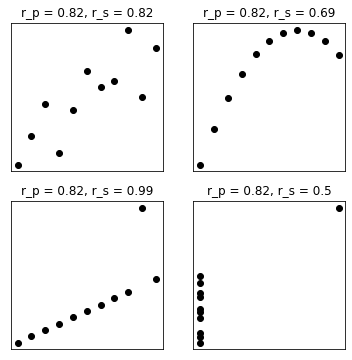

In [2]:
## Anscobe's quartet

anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])


# plot and compute correlations
fig,ax = plt.subplots(2,2,figsize=(6,6))
ax = ax.ravel()

for i in range(4):
    ax[i].plot(anscombe[:,i*2],anscombe[:,i*2+1],'ko')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    corr_p = stats.pearsonr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
    corr_s = stats.spearmanr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
    ax[i].set_title('r_p = %g, r_s = %g'%(np.round(corr_p*100)/100,np.round(corr_s*100)/100))

plt.show()

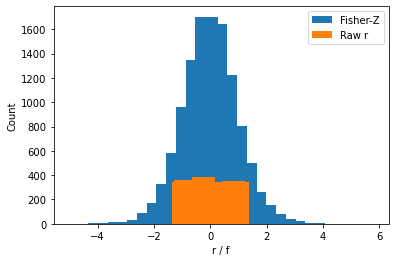

In [3]:
## Fisher-Z transform


# simulate correlation coefficients
N = 10000
r = 2*np.random.rand(N) - 1

# Fisher-Z
fz = np.arctanh(r)



# overlay the Fisher-Z
y,x = np.histogram(fz,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y)

# raw correlations
y,x = np.histogram(r,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y)


plt.xlabel('r / f')
plt.ylabel('Count')
plt.legend(('Fisher-Z','Raw r'))

plt.show()

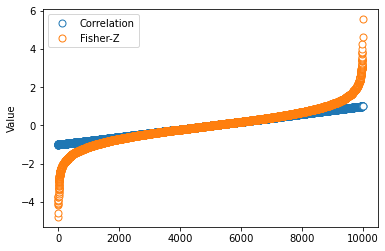

In [5]:
plt.plot(range(N),np.sort(r), 'o',markerfacecolor='w',markersize=7)
plt.plot(range(N),np.sort(fz),'o',markerfacecolor='w',markersize=7)
plt.ylabel('Value')
plt.legend(('Correlation','Fisher-Z'))

# zoom in
# plt.ylim([-.8,.8])
plt.show()